In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/sample_data/Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

2. Selección un datatset tabular de al menos 1000 columnas, 14 filas. Si elige imágenes igualmente puede convertir la imagen en datos tabulares de NxM. De esta selección indique cual es la clase o si no tiene.

Complemente con lo siguiente:

  a. Sin el uso de librerías en Python programe el percentil y cuartil de cada columna. Que distribución se puede aplicar en su caso normal, Bernoulli, gaussiana, poisson, otros. Indique la razón de su uso graficando con matplotlib.

In [7]:
def calcular_percentil(datos, percentil):
    if percentil <= 0 or percentil > 100:
        raise ValueError("El percentil debe estar entre 0 y 100")
    datos_ordenados = sorted(datos)
    indice = int(percentil / 100 * (len(datos_ordenados) - 1))
    return datos_ordenados[indice]

def calcular_cuartil(datos, cuartil):
  if(cuartil < 1 or cuartil > 4):
    raise ValueError("El cuartil debe estar entre 1 y 4")
  if cuartil == 1: return calcular_percentil(datos, 25)
  if cuartil == 2: return calcular_percentil(datos, 50)
  if cuartil == 3: return calcular_percentil(datos, 75)
  return calcular_percentil(datos, 100)

In [8]:
datos = sorted(df['LoanAmount'])
calcular_percentil(datos, 50)

21914

In [9]:
datos = sorted(df['LoanDuration'])
calcular_cuartil(datos, 2)

48

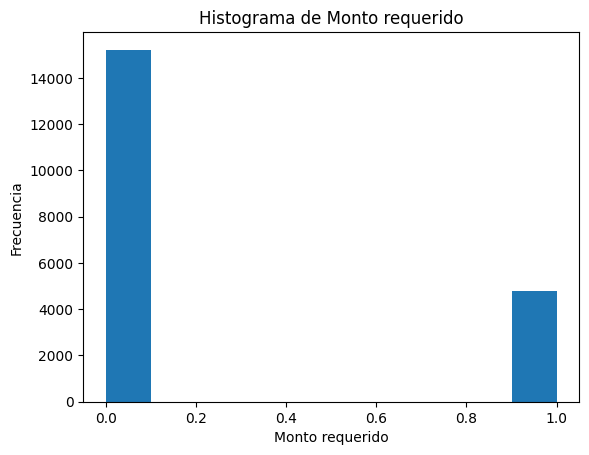

In [10]:
import matplotlib.pyplot as plt
datos = df['LoanApproved']
plt.hist(datos, bins=10)
plt.xlabel('Monto requerido')
plt.ylabel('Frecuencia')
plt.title('Histograma de Monto requerido')
plt.show()

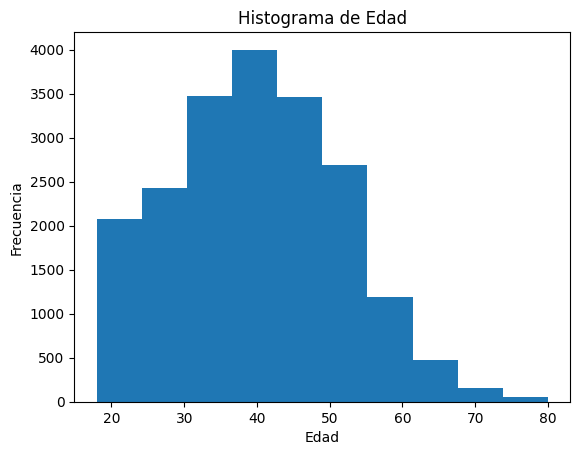

In [11]:
datos = df['Age']
plt.hist(datos, bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

In [12]:
df.iloc[:, 5:13]

,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments
0,Master,22,13152,48,Married,2,Own,183
1,Associate,15,26045,48,Single,1,Mortgage,496
2,Bachelor,26,17627,36,Married,2,Rent,902
3,High School,34,37898,96,Single,1,Mortgage,755
4,Associate,17,9184,36,Married,1,Mortgage,274
...,...,...,...,...,...,...,...,...
19995,High School,19,24521,36,Married,3,Rent,673
19996,Associate,33,25818,36,Married,5,Rent,414
19997,Bachelor,20,37033,72,Married,3,Mortgage,512
19998,High School,36,14760,72,Married,3,Own,986


b. De al menos tres columnas seleccionadas por usted indique que datos son relevantes de estas, grafique la misma (puede ser dispersión o mapa de calor, otros), indique al menos 4 características por columna seleccionada.

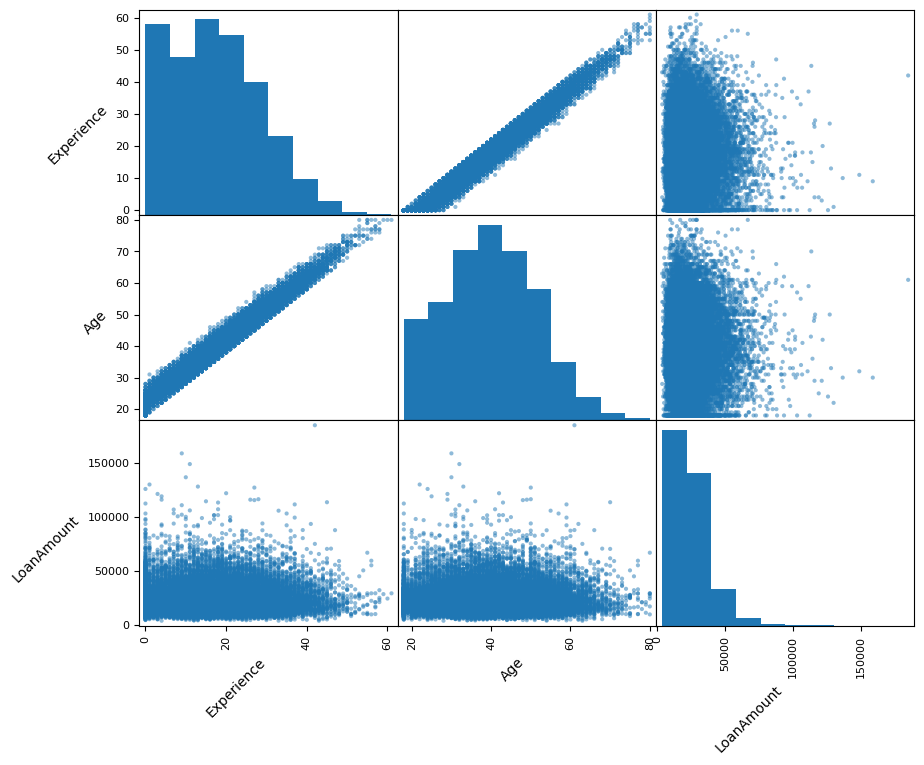

In [13]:
from pandas.plotting import scatter_matrix

datos = df[['Experience', 'Age', 'LoanAmount']]

axes = scatter_matrix(datos, figsize=(10, 8), alpha = 0.5, hist_kwds = {'bins':10})

#Roto las etiquetas ( puramente estético )
for ax in axes.flatten():
  ax.xaxis.label.set_rotation(45)
  ax.xaxis.label.set_ha('right')
  ax.yaxis.label.set_rotation(45)
  ax.yaxis.label.set_ha('right')

c. Obteniendo la media, mediana, moda con el uso de librerías, grafique un diagrama de cajas-bigote de al menos 3 columnas. Explique el resultado.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


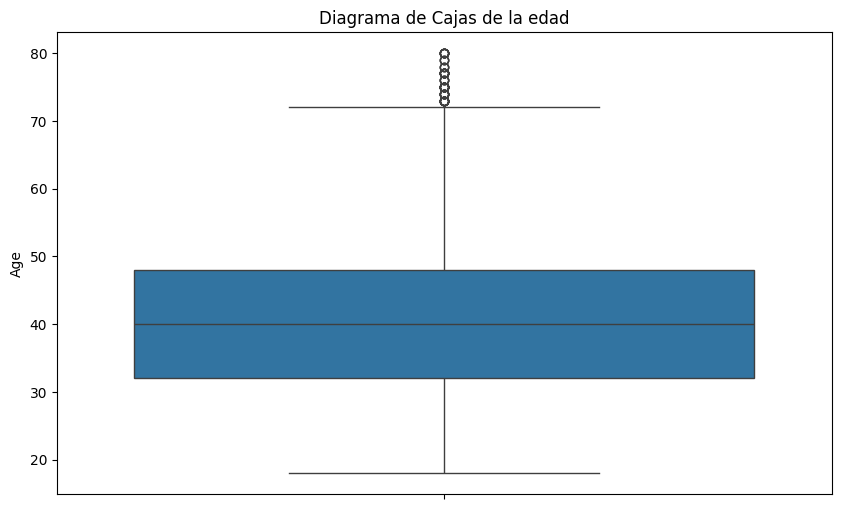

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diagrama de cajas para las tres columnas seleccionadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos['Age'])
plt.title('Diagrama de Cajas de la edad')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


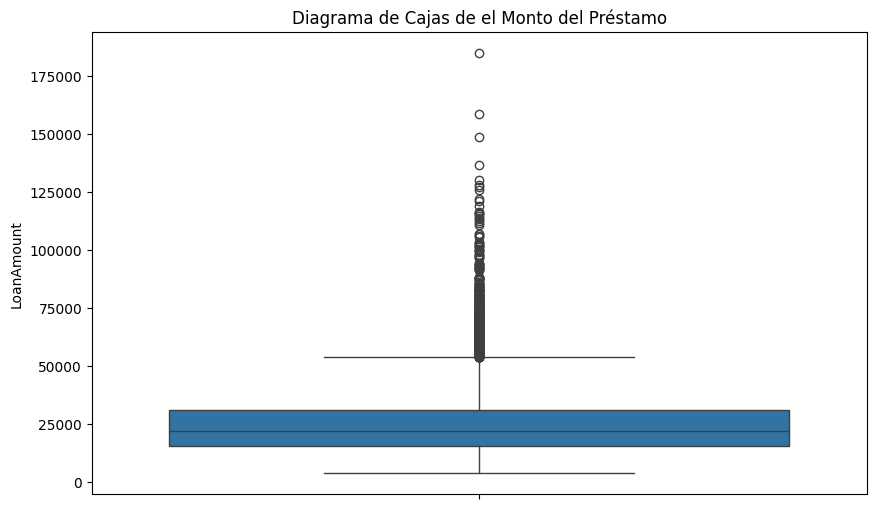

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos['LoanAmount'])
plt.title('Diagrama de Cajas de el Monto del Préstamo')
plt.show()

3.      Para el preprocesamiento debe usted migrar su dataset de csv u otro formato a arff, una vez realizado ello. Realice un etiqueta onehotencoder, labelencoder, discretización y normalización.

4.      Con el uso de librerías realiza en Python los mismos preprocesamiento del punto 3.

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
onehotencoder = OneHotEncoder()
onehot_encoded = onehotencoder.fit_transform(df[['MaritalStatus']])
onehot_encoded.toarray()[:15]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [17]:
labelencoder = LabelEncoder()
label_encoded = labelencoder.fit_transform(df['EmploymentStatus'])
label_encoded[:30]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0])

In [18]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
age_discretized = discretizer.fit_transform(df[['Age']])
age_discretized[:30]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [19]:
scaler_minmax = MinMaxScaler()
data_scaled = scaler_minmax.fit_transform(df[['LoanAmount']])
data_scaled

array([[0.05234787],
       [0.12355709],
       [0.0770637 ],
       ...,
       [0.18424483],
       [0.061229  ],
       [0.15675088]])

5.      Sin el uso de librerías programe las penalizaciones l1 y l2, aplicando normalización.

In [20]:
def penalizacion_l1(coeficientes, lambd):
    penalizacion = lambd * sum(abs(w) for w in coeficientes)
    return penalizacion
def penalizacion_l2(coeficientes, lambd):
    penalizacion = lambd * sum(w ** 2 for w in coeficientes)
    return penalizacion

In [22]:
coeficientes = [0.5, -1.2, 0.3, 2.0, -0.8]
lambd = 0.1

penalizacion_l1_valor = penalizacion_l1(coeficientes, lambd)
penalizacion_l1_valor

0.48

In [24]:
penalizacion_l2_valor = penalizacion_l2(coeficientes, lambd)
penalizacion_l2_valor

0.642

7.      Programe el anterior problema en Python con

a.       El uso de DEAP

In [26]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.9 MB/s eta 0:00:00


In [59]:
import random
import array
from deap import base, creator, tools, algorithms

# Definir la función f(x) = x^2 - x
def evalFunction(individual):
    x = individual[0]
    return x**2 - x,

# Crear el tipo de problema: Maximización
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode = 'b', fitness=creator.FitnessMax)

In [60]:
toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=50)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [61]:
toolbox.register("evaluate", evalFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [62]:
import numpy as np
def init():
  random.seed(60)
  pop = toolbox.population(n=300)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)
  pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3, stats=stats, halloffame=hof, verbose=True)
  return pop, log, hof

In [63]:
init()

gen	nevals	avg	std	min	max
0  	300   	0  	0  	0  	0  
1  	178   	0  	0  	0  	0  
2  	168   	0  	0  	0  	0  
3  	168   	0  	0  	0  	0  


([Individual('b', [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]),
  Individual('b', [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]),
  Individual('b', [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]),
  Individual('b', [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]),
  Individual('b', [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]),
  Individual('b', [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 

8.      De las características de altura, peso y talla; realice su propio dataset determinando cuál será su clase. Realice el cálculo de la entropía y ganancia de información.

La clase llegará a ser el atributo de Talla, puesto que sabiendo la altura y algo del peso podemos llegar a calcular la talla de poleras de una persona

In [64]:
import math
import pandas as pd

# Definimos el dataset
dataset = pd.DataFrame({
    'Altura': [160, 170, 175, 180, 150, 165, 185],
    'Peso': [55, 65, 70, 75, 50, 60, 80],
    'Talla': ['S', 'M', 'M', 'L', 'S', 'M', 'L']
})

# Función para calcular la entropía
def calcular_entropia(clase):
    clases, counts = np.unique(clase, return_counts=True)
    total = sum(counts)
    entropia = -sum((count / total) * math.log2(count / total) for count in counts)
    return entropia

# Cálculo de la entropía total del dataset (antes de dividir por una característica)
entropia_inicial = calcular_entropia(dataset['Talla'])
print(f"Entropía inicial del dataset: {entropia_inicial}")

# Función para calcular la ganancia de información
def ganancia_informacion(dataset, atributo, clase):
    entropia_inicial = calcular_entropia(clase)
    valores, counts = np.unique(dataset[atributo], return_counts=True)
    total = sum(counts)
    entropia_condicional = sum((counts[i] / total) * calcular_entropia(clase[dataset[atributo] == valor])
                               for i, valor in enumerate(valores))
    return entropia_inicial - entropia_condicional

# Cálculo de la ganancia de información para 'Altura' y 'Peso'
ganancia_altura = ganancia_informacion(dataset, 'Altura', dataset['Talla'])
ganancia_peso = ganancia_informacion(dataset, 'Peso', dataset['Talla'])

print(f"Ganancia de información por Altura: {ganancia_altura}")
print(f"Ganancia de información por Peso: {ganancia_peso}")

Entropía inicial del dataset: 1.5566567074628228
Ganancia de información por Altura: 1.5566567074628228
Ganancia de información por Peso: 1.5566567074628228
